# Hierarchical clustering

In [22]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as skmet

In [23]:
mcaPreproPoints = pd.read_csv("dataset/preprocessed-mca-shootings.csv")
mcaPreproCategories = pd.read_csv("dataset/preprocessed-mca-categories-shootings.csv")
famdPoints = pd.read_csv("dataset/preprocessed-famd-shootings.csv")

famdPoints

,0,1,2,3,4,5,6,7,8,9
0,1.409408,0.570111,-0.558744,-0.756580,-0.292834,0.365955,0.092134,-1.264439,0.251040,0.844229
1,0.949213,-0.314214,-0.097585,-0.461140,-0.350838,0.266920,-0.163641,-0.391941,-0.043697,0.386434
2,-1.258416,1.473916,0.215891,0.021696,0.616795,0.846983,-0.480348,1.210980,0.627515,1.076369
3,-0.074854,0.647348,-0.946673,0.162746,-1.151965,-0.351286,-0.112386,-1.181241,0.851208,0.009498
4,0.104122,0.090587,0.241266,-1.297269,-0.515937,0.498047,0.098525,0.664002,0.784879,-0.618767
...,...,...,...,...,...,...,...,...,...,...
4890,-1.072966,-0.336635,-0.549523,-0.374499,1.479234,-0.331654,1.244801,0.519065,1.101580,-0.258686
4891,-1.246684,-1.034545,-0.103138,0.437899,0.308519,0.247550,-0.050424,0.042855,-0.291085,-0.340441
4892,-0.847193,0.693018,0.190732,1.645872,-0.586147,0.156934,0.760710,0.386019,-1.025976,2.064429
4893,-1.066685,-0.174529,0.271797,0.312939,-0.288794,-0.450914,-0.751229,0.925073,-0.276100,1.003814


In [37]:
Z = scipy.cluster.hierarchy.linkage(famdPoints[["0", "1", "2", "3"]], method="centroid", metric="euclidean")

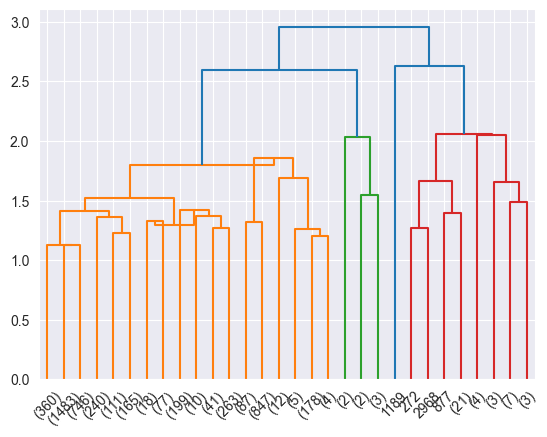

In [38]:
scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode="lastp")
plt.show()

[1, 2, 5, 3, 4]
587
780
1876
568
1084


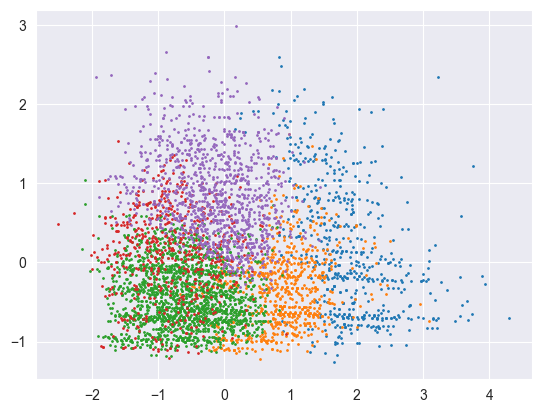

In [30]:
#display result
#separate cluster data
nodes = scipy.cluster.hierarchy.fcluster(Z, 5, criterion="maxclust")

l = []
for i in nodes:
    if i not in l:
        l.append(i)

print(l)

clusters = [{"x":[], "y":[]} for i in range(5)]
for i in range(len(famdPoints)):
    clusters[nodes[i]-1]["x"].append(famdPoints["0"].iloc[i])
    clusters[nodes[i]-1]["y"].append(famdPoints["1"].iloc[i])
#plot data
for cluster in clusters:
    print(len(cluster["x"]))
    plt.scatter(cluster["x"], cluster["y"], s=1)

plt.axes
plt.show()

## Silouhette of the clustering result

In [27]:
#getting the silhouette
nodes = scipy.cluster.hierarchy.fcluster(Z, 5, criterion="maxclust")
s = skmet.silhouette_score(famdPoints, labels=nodes, metric="euclidean")
s

0.3481780105398404

In [39]:
#comparing all methods and metrics of clustering
metrics=['euclidean', 'cityblock' , 'cosine'] # metrics used for linkage
methods=['single','complete','average', 'weighted', 'centroid', 'median', 'ward'] # methods used for linkage

for method in methods:
    metricsToUse = metrics
    if method in ["centroid", "median", "ward"]:
        metricsToUse = ["euclidean"]
    for metric in metricsToUse:
        Z = scipy.cluster.hierarchy.linkage(famdPoints[["0", "1", "2", "3"]], method=method, metric=metric)
        nodes = scipy.cluster.hierarchy.fcluster(Z, 5, criterion="maxclust")
        s = skmet.silhouette_score(famdPoints[["0", "1", "2", "3"]], labels=nodes, metric="euclidean")
        print(method, metric, s)

single euclidean 0.38343429439474785
single cityblock 0.38343429439474785
single cosine -0.23340793044805547
complete euclidean 0.14819018767711212
complete cityblock 0.1090841199151626
complete cosine 0.10571822113461944
average euclidean 0.1305496948792241
average cityblock 0.1346776820099725
average cosine 0.19564140332319746
weighted euclidean 0.08099761743662223
weighted cityblock 0.13714887465147266
weighted cosine 0.12506681160367775
centroid euclidean 0.19702285881104278
median euclidean 0.045796655809415304
ward euclidean 0.18641008557093877


Tested with all clustering methods, the best result is with centroid method and euclidean metric.

## Testing all dimensions

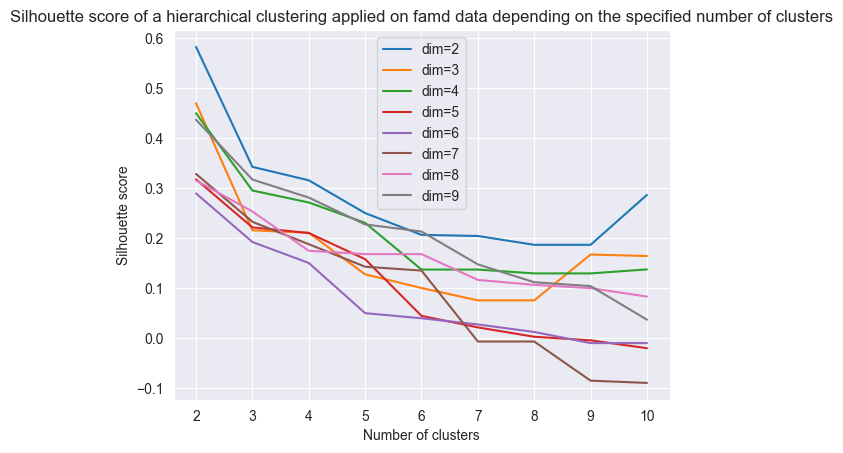

In [41]:
#testing with different generated famd dataset
dimRange = 10
clusterRange = 11

for i in range(2, dimRange):
    data = pd.read_csv("dataset/famd-" + str(i) + "-shootings.csv")
    Z = scipy.cluster.hierarchy.linkage(data, method="centroid", metric="euclidean")
    values = []
    for j in range(2, clusterRange):
        nodes = scipy.cluster.hierarchy.fcluster(Z, j, criterion="maxclust")
        s = skmet.silhouette_score(data, labels=nodes, metric="euclidean")
        values.append(s)

    plt.plot([i for i in range(2, clusterRange)], values, label = "dim=" + str(i))

plt.title("Silhouette score of a hierarchical clustering applied on famd data depending on the specified number of clusters")
plt.ylabel("Silhouette score")
plt.xlabel("Number of clusters")
plt.legend()
plt.show()

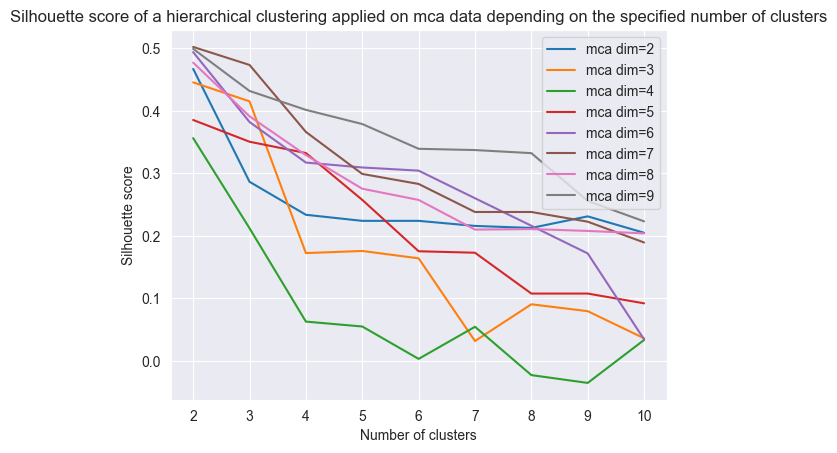

In [36]:
#testing with different generated mca dataset
dimRange = 10
clusterRange = 11

for i in range(2, dimRange):
    data = pd.read_csv("dataset/mca-" + str(i) + "-shootings.csv")
    Z = scipy.cluster.hierarchy.linkage(data, method="centroid", metric="euclidean")
    values = []
    for j in range(2, clusterRange):
        nodes = scipy.cluster.hierarchy.fcluster(Z, j, criterion="maxclust")
        s = skmet.silhouette_score(data, labels=nodes, metric="euclidean")
        values.append(s)

    plt.plot([i for i in range(2, clusterRange)], values, label = "mca dim=" + str(i))

plt.title("Silhouette score of a hierarchical clustering applied on mca data depending on the specified number of clusters")
plt.ylabel("Silhouette score")
plt.xlabel("Number of clusters")
plt.legend()
plt.show()